# Splines

In [1]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})


Polynominterpolation versucht eine globale Modellfunktion zu finden. Jedoch eignen sich Polynome mit hohen Graden im Allgemeinen nicht für eine Interpolation vieler Punkte. Einen anderen Ansatz verfolgen Splines. Diese sind Polynomzüge, welche die einzelnen Messpunkte verbinden und deren Grad klein – typischerweise zwischen eins und drei – ist. 

## Definition

Für $\sf n+1$ Messpunkte $\sf (x_i, y_i)$ kann eine Splinefunktion $\sf s_k$, hier ein Polynomspline, wie folgt definiert werden.

* Vorausgesetzt ist, dass die Messpunkte sortiert sind, d.h. $\sf x_0 < x_1 < \cdots < x_n$
* für jedes $\sf i = 0\dots n − 1$ ist $\sf s_k$ ein Polynom vom Grad $\sf k$ auf dem Intervall $\sf \left[x_i , x_{i+1}\right]$
* $\sf s_k$ ist auf $\sf \left[x_0 , x_n \right]$ $\sf (k − 1)$-mal stetig differenzierbar

Beispiele:
* $\sf k = 1$: Polygonzug
* $\sf k = 3$: kubische Polynomsplines (B-Splines)

## Kubische Splines

Die in der Praxis häufig eingesetzten kubischen Polynomsplines $\sf s_3$ ($\sf k= 3$) haben folgende Eigenschaften:
* $\sf s_3|\left[x_i,x_{i+1}\right] = \beta_0 +\beta_1 x + \beta_2 x^2 + \beta_3 x^3$
* $\sf s_3$ ist zweimal stetig differenzierbar auf $\sf \left[x_0,x_n\right]$, also insbesondere an den
Stützpunkten $\sf x_i$ der Messpunkte 

Die Koeffizienten $\sf \beta_i$ werden wie folgt bestimmt
* aus den $\sf n + 1$ Messpunkten ergeben sich $\sf n$ Intervalle, d.h. mit jeweils vier Koeffizienten sind es insgesamt $\sf 4n$ Koeffizienten
* Exakte Darstellung der Messpunkte ($\sf n + 1$ Gleichungen), d.h.: $\sf s_3(x_i) = y_i$
* Glattheitsbedingungen an den inneren Messpunkten ($\sf i=1\dots n-1$), mit jeweils ($\sf n − 1$ Gleichungen):
$$\sf s_3'(x_i)_- =s_3'(x_i)_+$$
$$\sf s_3''(x_i)_- =s_3''(x_i)_+$$
$$\sf s_3'''(x_i)_- =s_3'''(x_i)_+$$

* Damit sind es $\sf 4n − 2$ Gleichungen für $\sf 4n$ Koeffizienten

Um die beiden fehlenden Gleichungen zu finden bzw. zu bestimmen werden Randbedingungen oder Abschlussbedingungen benötigt.
Die gängigsten Bedingungen sind:
* natürliche Splines: die Krümung am Rand verschwindet, d.h.:
$$\sf s_3''(x_0) = s_3''(x_n) = 0 $$
* periodische Splines: die Steigung und Krümung ist an beiden Rändern gleich
$$\sf s_3'(x_0) = s_3'(x_n)$$ 
$$\sf s_3''(x_0) = s_3''(x_n)$$
* Hermite Splines: die Steigungen am Rand werden explizit vorgegeben (hier durch $\sf u$ und $\sf v$)
$$\sf s_3'(x_0) = u $$
$$\sf s_3'(x_n) = v $$

## Anwendung

Im Folgenden werden zwei Beispiele, $\sf s_1$ und $\sf s_3$, für die Erstellung von Splines mit Python vorgestellt. 

In [2]:
# Erzeugung von Messpunkten
n = 7
xi = np.linspace(0, np.pi, n)
yi = np.sin(xi)

Für die $\sf s_1$ Splines, kann die Funktion `np.interp` verwendet werden. Sie führt eine lineare Interpolation zwischen gegebenen Wertepaaren durch.

In [17]:
# Wertebereich für die Visualisierung der Interpolation
x = np.linspace(0, np.pi, n*6)
y = np.sin(x)

In [24]:
# Interpolation
y_s1 = np.interp(x, xi, yi)

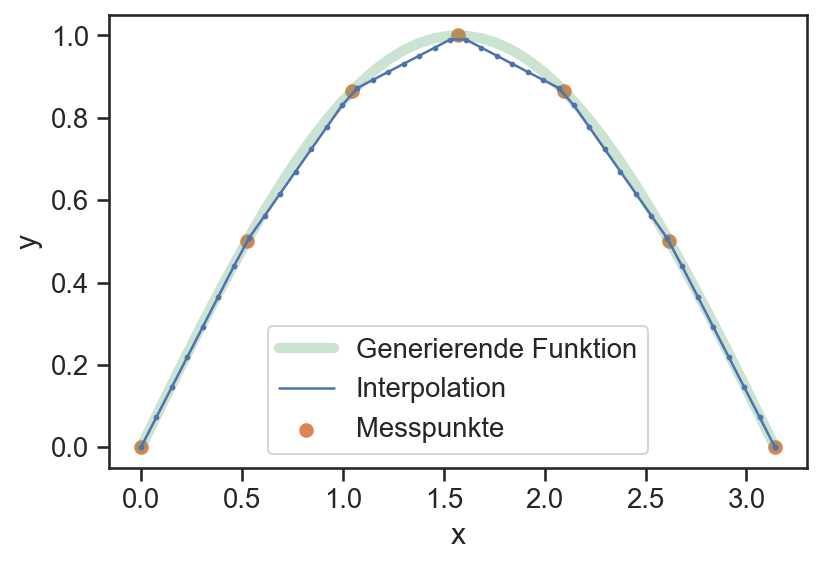

In [27]:
plt.plot(x,y, alpha=0.3, color='C2', lw=5, 
         label='Generierende Funktion')
plt.plot(x, y_s1, color='C0', label='Interpolation')
plt.scatter(x, y_s1, s=3, zorder=3, color='C0')
plt.scatter(xi, yi, color='C1', label='Messpunkte')

plt.xlabel('x')
plt.ylabel('y')
plt.legend();

Die $\sf s_3$ Splines können mit Funktionen aus dem scipy-Modul berechnet werden. Dazu werden zunächst die Koeffizienten bestimmt (`scipy.interpolate.splrep`) und diese ermöglichen die gewünschte Auswertung, welche mit der Funktion `scipy.interpolate.splev` vorgenommen werden kann. 

In [16]:
import scipy.interpolate as si

In [19]:
s3 = si.splrep(xi, yi)
y_s3 = si.splev(x, s3)

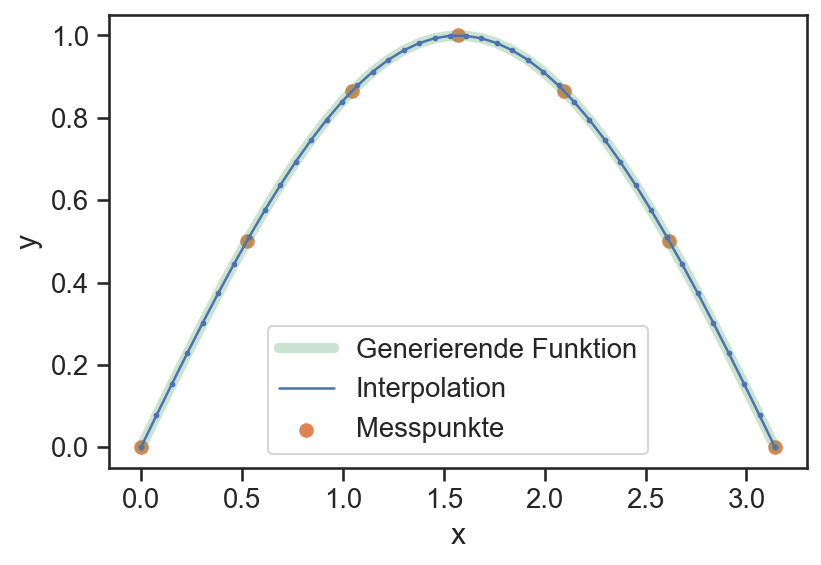

In [28]:
plt.plot(x,y, alpha=0.3, color='C2', lw=5, 
         label='Generierende Funktion')
plt.plot(x, y_s3, color='C0', label='Interpolation')
plt.scatter(x, y_s3, s=3, zorder=3, color='C0')
plt.scatter(xi, yi, color='C1', label='Messpunkte')

plt.xlabel('x')
plt.ylabel('y')
plt.legend();